In [49]:
import numpy as np
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [32]:
day_n2 = pd.read_csv('./round-1-island-data-bottle/prices_round_1_day_-2.csv', sep=';')
day_n1 = pd.read_csv('./round-1-island-data-bottle/prices_round_1_day_-1.csv', sep=';')
day_0 = pd.read_csv('./round-1-island-data-bottle/prices_round_1_day_0.csv', sep=';')

day                       -2
timestamp             999900
product            AMETHYSTS
bid_price_1             9996
bid_volume_1               2
bid_price_2           9995.0
bid_volume_2            30.0
bid_price_3              NaN
bid_volume_3             NaN
ask_price_1            10004
ask_volume_1               2
ask_price_2          10005.0
ask_volume_2            30.0
ask_price_3              NaN
ask_volume_3             NaN
mid_price            10000.0
profit_and_loss          0.0
Name: 19999, dtype: object

In [34]:
ameth_day_n2 = day_n2[day_n2['product']=='AMETHYSTS'].reset_index(drop=True)
ameth_day_n1 = day_n1[day_n1['product']=='AMETHYSTS'].reset_index(drop=True)
ameth_day_0 = day_0[day_0['product']=='AMETHYSTS'].reset_index(drop=True)

star_day_n2 = day_n2[day_n2['product']=='STARFRUIT'].reset_index(drop=True)
star_day_n1 = day_n1[day_n1['product']=='STARFRUIT'].reset_index(drop=True)
star_day_0 = day_0[day_0['product']=='STARFRUIT'].reset_index(drop=True)


star_day_0.loc[10:20]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
10,0,1000,STARFRUIT,5037,2,5036.0,26.0,NaN,NaN,5043,28,NaN,NaN,NaN,NaN,5040.0,0.0
11,0,1100,STARFRUIT,5038,6,5037.0,25.0,NaN,NaN,5043,2,5044.0,23.0,NaN,NaN,5040.5,0.0
12,0,1200,STARFRUIT,5037,8,5036.0,30.0,NaN,NaN,5043,30,NaN,NaN,NaN,NaN,5040.0,0.0
13,0,1300,STARFRUIT,5036,28,NaN,NaN,NaN,NaN,5037,5,5042.0,1.0,5043.0,27.0,5036.5,0.0
14,0,1400,STARFRUIT,5036,25,NaN,NaN,NaN,NaN,5043,26,NaN,NaN,NaN,NaN,5039.5,0.0
15,0,1500,STARFRUIT,5041,1,5036.0,22.0,NaN,NaN,5043,22,NaN,NaN,NaN,NaN,5042.0,0.0
16,0,1600,STARFRUIT,5037,23,NaN,NaN,NaN,NaN,5043,1,5044.0,22.0,NaN,NaN,5040.0,0.0
17,0,1700,STARFRUIT,5036,27,NaN,NaN,NaN,NaN,5041,8,5043.0,27.0,NaN,NaN,5038.5,0.0
18,0,1800,STARFRUIT,5037,10,5036.0,25.0,NaN,NaN,5043,2,5044.0,25.0,NaN,NaN,5040.0,0.0
19,0,1900,STARFRUIT,5036,31,NaN,NaN,NaN,NaN,5043,31,NaN,NaN,NaN,NaN,5039.5,0.0


In [20]:
variance = ameth_day_n2['mid_price'].var()**0.5
variance

1.5138417756463747

## Log Returns Stationarity

In [39]:
ameth_log_ret_n2 = np.log(ameth_day_n2['mid_price'] / ameth_day_n2['mid_price'].shift(1))
ameth_log_ret_n1 = np.log(ameth_day_n1['mid_price'] / ameth_day_n1['mid_price'].shift(1))
ameth_log_ret_0 = np.log(ameth_day_0['mid_price'] / ameth_day_0['mid_price'].shift(1))
ameth_log_ret_n2

0           NaN
1       0.00025
2      -0.00025
3       0.00000
4      -0.00035
         ...   
9995    0.00000
9996    0.00015
9997   -0.00015
9998   -0.00030
9999    0.00030
Name: mid_price, Length: 10000, dtype: float64

In [37]:
res = adfuller(ameth_log_ret_n2[1:])
print(f'ADF Statistic: {res[0]}')
print(f'p-value: {res[1]}')
res

ADF Statistic: -28.289978082634015
p-value: 0.0


(-28.289978082634015,
 0.0,
 38,
 9960,
 {'1%': -3.4310067255162737,
  '5%': -2.86183023348434,
  '10%': -2.5669244861474008},
 -146648.7451759243)

In [40]:
star_log_ret_n2 = np.log(star_day_n2['mid_price'] / star_day_n2['mid_price'].shift(1))
star_log_ret_n1 = np.log(star_day_n1['mid_price'] / star_day_n1['mid_price'].shift(1))
star_log_ret_0 = np.log(star_day_0['mid_price'] / star_day_0['mid_price'].shift(1))
star_log_ret_0

0            NaN
1       0.000496
2      -0.000397
3       0.000099
4      -0.000198
          ...   
9995    0.000198
9996   -0.000297
9997    0.000495
9998   -0.000792
9999    0.000297
Name: mid_price, Length: 10000, dtype: float64

In [69]:
ameth_sum_log_ret_n2 = np.log(ameth_day_n2['mid_price'] / ameth_day_n2['mid_price'].shift(1)).cumsum()
ameth_sum_log_ret_n1 = np.log(ameth_day_n1['mid_price'] / ameth_day_n1['mid_price'].shift(1)).cumsum()
ameth_sum_log_ret_0 = np.log(ameth_day_0['mid_price'] / ameth_day_0['mid_price'].shift(1)).cumsum()
ameth_sum_log_ret_0

0           NaN
1      -0.00025
2      -0.00015
3      -0.00045
4      -0.00005
         ...   
9995   -0.00030
9996   -0.00025
9997   -0.00015
9998   -0.00015
9999   -0.00015
Name: mid_price, Length: 10000, dtype: float64

In [70]:
star_sum_log_ret_n2 = np.log(star_day_n2['mid_price'] / star_day_n2['mid_price'].shift(1)).cumsum()
star_sum_log_ret_n1 = np.log(star_day_n1['mid_price'] / star_day_n1['mid_price'].shift(1)).cumsum()
star_sum_log_ret_0 = np.log(star_day_0['mid_price'] / star_day_0['mid_price'].shift(1)).cumsum()

## Log Returns Autocorrelation

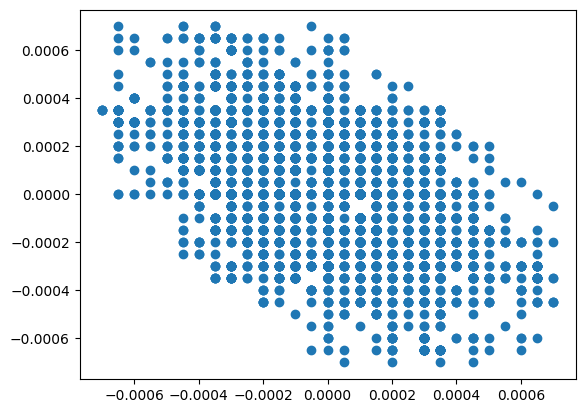

In [48]:
plt.scatter(ameth_log_ret_n1,ameth_log_ret_n1.shift(-1))
plt.show()

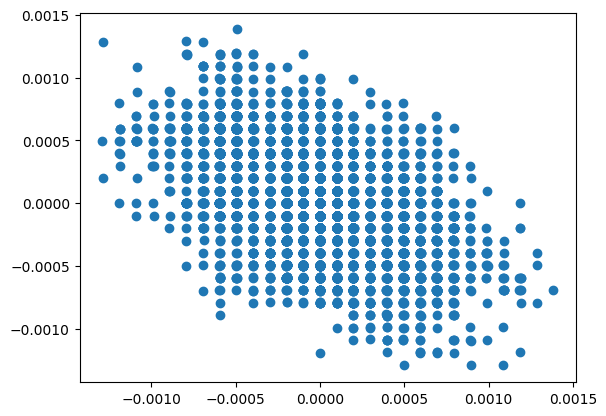

In [47]:
plt.scatter(star_log_ret_n1,star_log_ret_n1.shift(1))
plt.show()

<AxesSubplot:xlabel='delay of ameth', ylabel='correlation coefficient'>

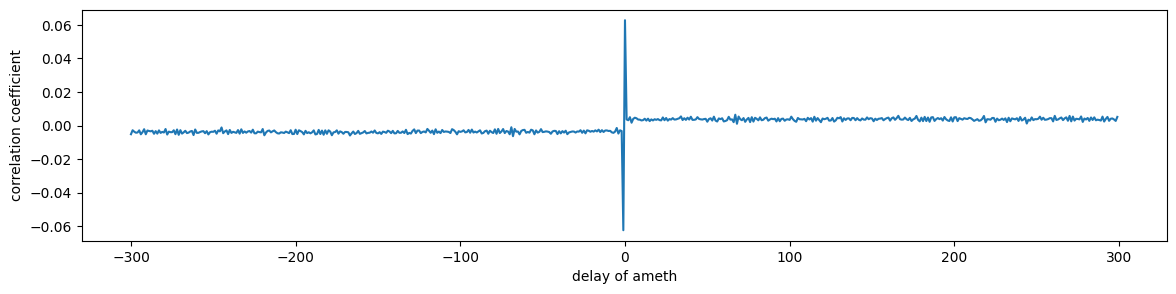

In [80]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))


# crosscorr_matrix = np.zeros([4,4])
# crossindex_matrix = np.zeros([4,4]) 
# for i in range(4):
#     for j in range(4):
#         d1 = normalized_df[f'Stock{i+1}r']
#         d2 = normalized_df[f'Stock{j+1}r']
#         arr = np.array([[lag,crosscorr(d1,d2, lag)] for lag in range(-300,300)]).transpose()
#         crosscorr_matrix[i][j] = max(arr[1],key=abs)
#         crossindex_matrix[i][j] = arr[0][int(np.argmax(np.abs(arr[1])))]
        
d1 = star_sum_log_ret_n1
d2 = star_log_ret_n1
rs = np.array([[lag, crosscorr(d1,d2, lag)] for lag in range(-300,300)])
        
rs_df = pd.DataFrame(rs,columns=['delay of ameth','correlation coefficient'])
f,ax=plt.subplots(figsize=(14,3))
seaborn.lineplot(data=rs_df,x='delay of ameth',y='correlation coefficient')
# ax.axvline(rs_df["index"][np.argmax(rs_df["value"])],color='r',linestyle='--',label='Peak synchrony')
# ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[-1,1],xlim=[-800,800], xlabel='Offset',ylabel='Pearson r')
# ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
# ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

<AxesSubplot:xlabel='delay of star', ylabel='correlation coefficient'>

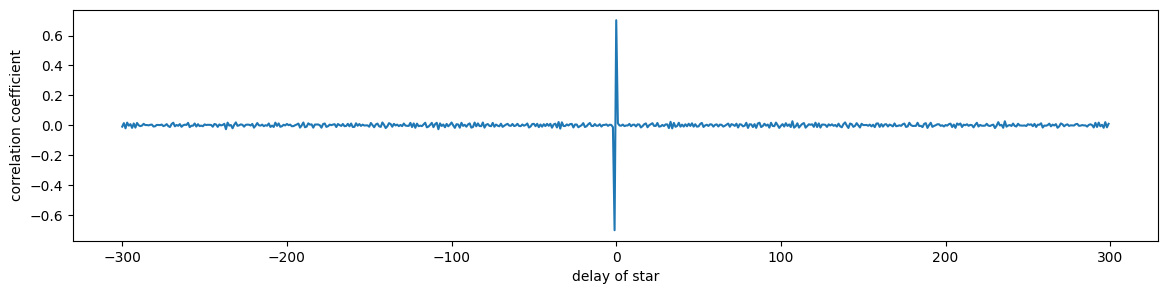

In [74]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))


# crosscorr_matrix = np.zeros([4,4])
# crossindex_matrix = np.zeros([4,4]) 
# for i in range(4):
#     for j in range(4):
#         d1 = normalized_df[f'Stock{i+1}r']
#         d2 = normalized_df[f'Stock{j+1}r']
#         arr = np.array([[lag,crosscorr(d1,d2, lag)] for lag in range(-300,300)]).transpose()
#         crosscorr_matrix[i][j] = max(arr[1],key=abs)
#         crossindex_matrix[i][j] = arr[0][int(np.argmax(np.abs(arr[1])))]
        
d1 = ameth_sum_log_ret_n1
d2 = ameth_log_ret_n1
rs = np.array([[lag, crosscorr(d1,d2, lag)] for lag in range(-300,300)])
        
rs_df = pd.DataFrame(rs,columns=['delay of star','correlation coefficient'])
f,ax=plt.subplots(figsize=(14,3))
seaborn.lineplot(data=rs_df,x='delay of star',y='correlation coefficient')
# ax.axvline(rs_df["index"][np.argmax(rs_df["value"])],color='r',linestyle='--',label='Peak synchrony')
# ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[-1,1],xlim=[-800,800], xlabel='Offset',ylabel='Pearson r')
# ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
# ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

In [75]:
print(rs_df['correlation coefficient'][rs_df['correlation coefficient'] < 0].min())

-0.7031303395279366


In [76]:
rs_df.loc[rs_df['correlation coefficient']< -0.7]

,delay of star,correlation coefficient
299,-1.0,-0.70313


In [77]:
rs_df.loc[rs_df['correlation coefficient']> 0.7]

,delay of star,correlation coefficient
300,0.0,0.703056


In [78]:
rs_df

,delay of star,correlation coefficient
0,-300.0,-0.009465
1,-299.0,0.013996
2,-298.0,-0.020700
3,-297.0,0.017401
4,-296.0,-0.002978
...,...,...
595,295.0,0.002968
596,296.0,-0.017256
597,297.0,0.020541
598,298.0,-0.013961


In [79]:
rs_df.shift(1)

,delay of star,correlation coefficient
0,NaN,NaN
1,-300.0,-0.009465
2,-299.0,0.013996
3,-298.0,-0.020700
4,-297.0,0.017401
...,...,...
595,294.0,-0.006961
596,295.0,0.002968
597,296.0,-0.017256
598,297.0,0.020541
